# Distribution of receptive field sizes across all units

### Name: Renzhi Li


### Date: 3/23/2022


### PID: 730476567


### Jupyter Notebook Number: 10

## Purpose/Objective:
We want to examine sex differences in the visual receptive field between lower and higher areas with neuropixel data.

## In-lab: changed idea to lower(LGN) vs higher brain regions (AM)

## Protocol:
1.Import all Allen Data for neuropixels

2.Create variables and sort data based on our interests

3.Allign data to stimulus presentation 

4.Receptive field mapping


## Expected Results:
1.Plot Distribution of receptive field sizes across all units of four groups

### Installing AllenSDK in local environment

In [1]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
  Using cached ruamel.yaml-0.17.21-py3-none-any.whl (109 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeplabcut 2.1.6.2 requires h5py~=2.7, but you have h5py 3.6.0 which is incompatible.
deeplabcut 2.1.6.2 requires matplotlib==3.0.3, but you have matplotlib 3.1.1 which is incompatible.
deeplabcut 2.1.6.2 requires numpy==1.16.4, but you have numpy 1.21.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


### Import Packages

In [3]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import xarray as xr
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

# import EcephysSessions
from allensdk.brain_observatory.ecephys.ecephys_session import EcephysSession
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.stimulus_analysis.receptive_field_mapping import ReceptiveFieldMapping
from allensdk.brain_observatory.ecephys.ecephys_session import (
    EcephysSession, 
    removed_unused_stimulus_presentation_columns
)

#Graphing for summary
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.utils import resample 

import warnings
warnings.filterwarnings("ignore")

In [4]:
#data directory for extracellular ephysdata: /overflow/NSCI274/projects/ecephysdata/

data_directory = "/overflow/NSCI274/projects/ecephysdata/"
code_directory = "/nas/longleaf/home/renzhi/"

manifest_path = os.path.join(data_directory,"manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [5]:
sessions = cache.get_session_table()

#total_sessions = len(sessions)
#sessions.head(n)

### Data Filter

#### Male with LGN

In [6]:
filtered_sessions_male_LGN = sessions[(sessions.sex == 'M') & \
                             (['LGd' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

total_sessions_male_LGN = len(filtered_sessions_male_LGN)

print(str(total_sessions_male_LGN))

#show the graph
#filtered_sessions_male_LGN.head()

28


#### Male with AM

In [7]:
filtered_sessions_male_AM = sessions[(sessions.sex == 'M') & \
                             (['VISam' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]
total_sessions_male_AM = len(filtered_sessions_male_AM)

print(str(total_sessions_male_AM))

#show the graph
#filtered_sessions_male_AM.head()

38


#### Female with LGN

In [8]:
filtered_sessions_female_LGN = sessions[(sessions.sex == 'F') & \
                             #(sessions.full_genotype.str.find('Sst') > -1) & \
                             #(sessions.session_type == 'brain_observatory_1.1') & \
                             (['LGd' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]
total_sessions_female_LGN = len(filtered_sessions_female_LGN)

print(str(total_sessions_female_LGN))

#show the graph
#filtered_sessions_female_LGN.head(n = 6)

6


#### Female with AM

In [9]:
filtered_sessions_female_AM = sessions[(sessions.sex == 'F') & \
                             (['VISam' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]
total_sessions_female_AM = len(filtered_sessions_female_AM)

print(str(total_sessions_female_AM))

#show the graph
#filtered_sessions_female_AM.head()

12


### Distribution of the Receptive Field for All Sessions & Area

In [10]:
female_LGN_session_ids = []
for session_id, row in filtered_sessions_female_LGN.iterrows():
    female_LGN_session_ids.append(session_id)
print(female_LGN_session_ids)

female_AM_session_ids = []
for session_id, row in filtered_sessions_female_AM.iterrows():
    female_AM_session_ids.append(session_id)
print(female_AM_session_ids)

male_LGN_session_ids = []
for session_id, row in filtered_sessions_male_LGN.iterrows():
    male_LGN_session_ids.append(session_id)
print(male_LGN_session_ids)

male_AM_session_ids = []
for session_id, row in filtered_sessions_male_LGN.iterrows():
    male_AM_session_ids.append(session_id)
print(male_AM_session_ids)

LGN_session_groups = [female_LGN_session_ids,male_LGN_session_ids]
AM_session_groups = [female_AM_session_ids,male_AM_session_ids]

[746083955, 751348571, 819186360, 819701982, 821695405, 839068429]
[751348571, 760693773, 773418906, 786091066, 794812542, 798911424, 816200189, 819186360, 819701982, 821695405, 839068429, 847657808]
[715093703, 719161530, 721123822, 743475441, 744228101, 750332458, 750749662, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 759883607, 760345702, 761418226, 763673393, 766640955, 768515987, 771160300, 771990200, 778240327, 779839471, 781842082, 791319847, 799864342, 835479236, 839557629]
[715093703, 719161530, 721123822, 743475441, 744228101, 750332458, 750749662, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 759883607, 760345702, 761418226, 763673393, 766640955, 768515987, 771160300, 771990200, 778240327, 779839471, 781842082, 791319847, 799864342, 835479236, 839557629]


### Color Pallete

In [11]:
pallete = ['#0000FF','#FF0000']

### LGN Graphing

In [28]:
df = pd.read_csv(os.path.join(code_directory, 'data', 'unit_table.csv'), low_memory=False)

In [29]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.figure(14781)
plt.clf()

areas = ('LGd','LGd')

num_units = 0
unit_count = np.zeros((4,))
mouse_count = np.zeros((4,))

def get_bootstrap_95ci(M, measure_of_central_tendency, N=1000):
    n = int(len(M)/2)
    est = np.zeros((N,))
    for i in range(N):
        boot = M[np.random.permutation(len(M))[:n]]
        est[i] = measure_of_central_tendency(boot)
        
    return np.percentile(est,97.5) - np.nanmean(est)

def convert_to_ms(value_in_s):
    return value_in_s*1000

def take_log(original_value):
    return np.log10(original_value)

def do_not_change(original_value):
    return original_value

measure_of_central_tendency = np.nanmean

np.random.seed(10)

num_per_area = np.zeros((4,))
num_with_rfs = np.zeros((4,))
num_after_filter = np.zeros((4,))
num_after_fl = np.zeros((4,))
num_after_ac = np.zeros((4,))
mice_per_area = np.zeros((4,))

if True:
    metrics = ['area_rf']
    labels = ['RF area ($deg^2$)']
    bins = [np.linspace(10,2000,30)]
    function_to_apply = [do_not_change]
    y_vals = [520]

else:
    metrics = [ 'firing_rate']
    labels = ['$log_{10}$ Firing rate']
    bins = [np.linspace(-1,2)]
    function_to_apply = [take_log]
    y_vals = [0.75]

centers = np.zeros((8,len(metrics)))
errorbars = np.zeros((8,len(metrics)))

max_values = np.zeros((len(metrics),))

all_values = {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}}

legend = ['female LGN','male LGN']

<Figure size 576x432 with 0 Axes>

In [30]:
all_df = []
M_arr = []
h_arr = []
h_filt_arr = []
b_arr = []

for idx, area in enumerate(areas):
    selection = (df.ecephys_session_id.isin(LGN_session_groups[idx]))
    selection &= (df.ecephys_structure_acronym == area)
    
    num_per_area[idx] = np.sum(selection)
    
    selection &= (df.p_value_rf < 0.01) #& \
    
    num_with_rfs[idx] = np.sum(selection)
    
    selection &= (df.area_rf < 2500)
    selection &= (df.snr > 1)
    selection &= (df.firing_rate_dg > 0.1)
    num_after_filter[idx] = np.sum(selection)
    #print(np.sum(selection))
    #all_df.append(df[selection])
             
    mice_per_area[idx] = len(df[selection].specimen_id.unique())
    #print(mice_per_area)
    
    for metric_idx, metric in enumerate(metrics):       
        if metric_idx == 0:
            selection &= (df.time_to_first_spike_fl < 0.1) 
            num_after_fl[idx] = np.sum(selection)
        elif metric_idx == 3:
            selection &= (df[metric] < 300)
            selection &= (df[metric] > 1)
            selection &= (df.spike_count_ac > 50)
            selection &= (df.err_ac < 20)
            num_after_ac[idx] = np.sum(selection)
    
        M = function_to_apply[metric_idx](df[selection][metric].values)
        M_arr.append(M)
        h, b = np.histogram(M, bins=bins[metric_idx], density=True)
        h_arr.append(h)
        
        h_filt = gaussian_filter1d(h,1.5)
        h_filt_arr.append(h_filt)
        b_arr.append(b[:-1])

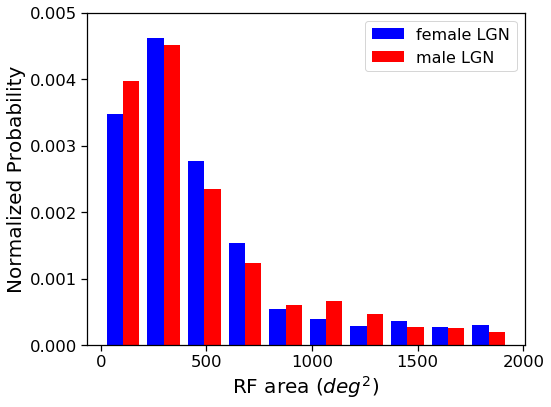

In [31]:
plt.rcParams['figure.figsize'] = [8, 6]
#plt.plot(b[:-1],h_filt,color=pallete[idx])
plt.hist(b_arr, weights= h_filt_arr, label = legend, color=pallete)
plt.ylim([0, 0.005])
plt.xlabel(labels[0], fontsize=20)
plt.ylabel('Normalized Probability', fontsize=20)
#plt.title()
plt.legend(legend,loc='upper right',prop={'size': 16})
plt.tight_layout()

### AM Graphing

In [32]:
df = pd.read_csv(os.path.join(code_directory, 'data', 'unit_table.csv'), low_memory=False)

In [33]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.figure(14781)
plt.clf()

areas = ('VISam','VISam')

num_units = 0
unit_count = np.zeros((4,))
mouse_count = np.zeros((4,))

def get_bootstrap_95ci(M, measure_of_central_tendency, N=1000):
    n = int(len(M)/2)
    est = np.zeros((N,))
    for i in range(N):
        boot = M[np.random.permutation(len(M))[:n]]
        est[i] = measure_of_central_tendency(boot)
        
    return np.percentile(est,97.5) - np.nanmean(est)

def convert_to_ms(value_in_s):
    return value_in_s*1000

def take_log(original_value):
    return np.log10(original_value)

def do_not_change(original_value):
    return original_value

measure_of_central_tendency = np.nanmean

np.random.seed(10)

num_per_area = np.zeros((4,))
num_with_rfs = np.zeros((4,))
num_after_filter = np.zeros((4,))
num_after_fl = np.zeros((4,))
num_after_ac = np.zeros((4,))
mice_per_area = np.zeros((4,))

if True:
    metrics = ['area_rf']
    labels = ['RF area ($deg^2$)']
    bins = [np.linspace(10,2000,30)]
    function_to_apply = [ do_not_change]
    y_vals = [520]

else:
    metrics = [ 'firing_rate']
    labels = ['$log_{10}$ Firing rate']
    bins = [np.linspace(-1,2)]
    function_to_apply = [take_log]
    y_vals = [0.75]

centers = np.zeros((8,len(metrics)))
errorbars = np.zeros((8,len(metrics)))

max_values = np.zeros((len(metrics),))

all_values = {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}}

legend = ['female AM','male AM']

<Figure size 576x432 with 0 Axes>

In [34]:
all_df = []
M_arr = []
h_arr = []
h_filt_arr = []
b_arr = []

for idx, area in enumerate(areas):
    selection = (df.ecephys_session_id.isin(AM_session_groups[idx]))
    selection &= (df.ecephys_structure_acronym == area)
    
    num_per_area[idx] = np.sum(selection)
    
    selection &= (df.p_value_rf < 0.01) #& \
    
    num_with_rfs[idx] = np.sum(selection)
    
    selection &= (df.area_rf < 2500)
    selection &= (df.snr > 1)
    selection &= (df.firing_rate_dg > 0.1)
    num_after_filter[idx] = np.sum(selection)
    #print(np.sum(selection))
    #all_df.append(df[selection])
             
    mice_per_area[idx] = len(df[selection].specimen_id.unique())
    #print(mice_per_area)
    
    for metric_idx, metric in enumerate(metrics):       
        if metric_idx == 0:
            selection &= (df.time_to_first_spike_fl < 0.1) 
            num_after_fl[idx] = np.sum(selection)
        elif metric_idx == 3:
            selection &= (df[metric] < 300)
            selection &= (df[metric] > 1)
            selection &= (df.spike_count_ac > 50)
            selection &= (df.err_ac < 20)
            num_after_ac[idx] = np.sum(selection)
    
        M = function_to_apply[metric_idx](df[selection][metric].values)
        M_arr.append(M)
        h, b = np.histogram(M, bins=bins[metric_idx], density=True)
        h_arr.append(h)
        
        h_filt = gaussian_filter1d(h,1.5)
        h_filt_arr.append(h_filt)
        b_arr.append(b[:-1])

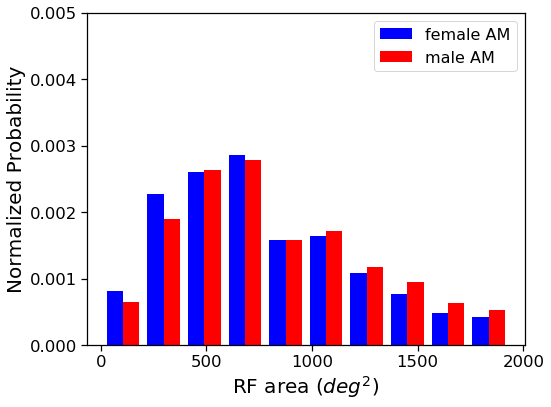

In [35]:
plt.rcParams['figure.figsize'] = [8, 6]
#plt.plot(b[:-1],h_filt,color=pallete[idx])
plt.hist(b_arr, weights= h_filt_arr, label = legend, color=pallete)
plt.ylim([0, 0.0050])
plt.xlabel(labels[0], fontsize=20)
plt.ylabel('Normalized Probability', fontsize=20)
#plt.title()
plt.legend(legend,loc='upper right',prop={'size': 16})
plt.tight_layout()
plt.savefig('output.png', dpi=300)